## 財務數學（一）11/1 HW7-2
### 使用Python做TSMC股價的GBM模擬
1. 模擬期間：2012/1/1~2022/12/31
2. 股價動差參考期間：2002/1/1~2013/1/1

In [15]:
# 載入套件
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 下載TSMC歷史股價資料(2002/1/1~2012/12/31，因為要模擬的是2012~2022的股價走勢，所以往前抓取十年)
symbol = '2330.TW'
data = yf.download(symbol, start="2002-01-01", end="2013-01-01")['Adj Close']
print(data[-1])

[*********************100%***********************]  1 of 1 completed
70.53609466552734


In [17]:
# 計算股價報酬率之期望值與變異數
log_returns = np.log(data / data.shift(1))
mu = np.mean(log_returns) * 252
sigma = np.std(log_returns) * np.sqrt(252)

In [18]:
# 模型設定與起始值
S0 = data[-1] # 初始股價，2012/12/31

T = 10  # 模擬時間（年）
dt = 1 / 252  # 時間間隔（以年為單位）
n_steps = int(T / dt)  # 總時間步數
# 總共會有2520點！
n_sims = 100  # 模擬路徑數

# 初始化存儲模擬結果Matrix
simulation = np.zeros((n_steps, n_sims))

# 設定初始股價
simulation[0] = S0

In [19]:
# 進行模擬
for t in range(1, n_steps):
    Z = np.random.normal(0, 1, n_sims)
    S_t = simulation[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    simulation[t] = S_t
# simulation


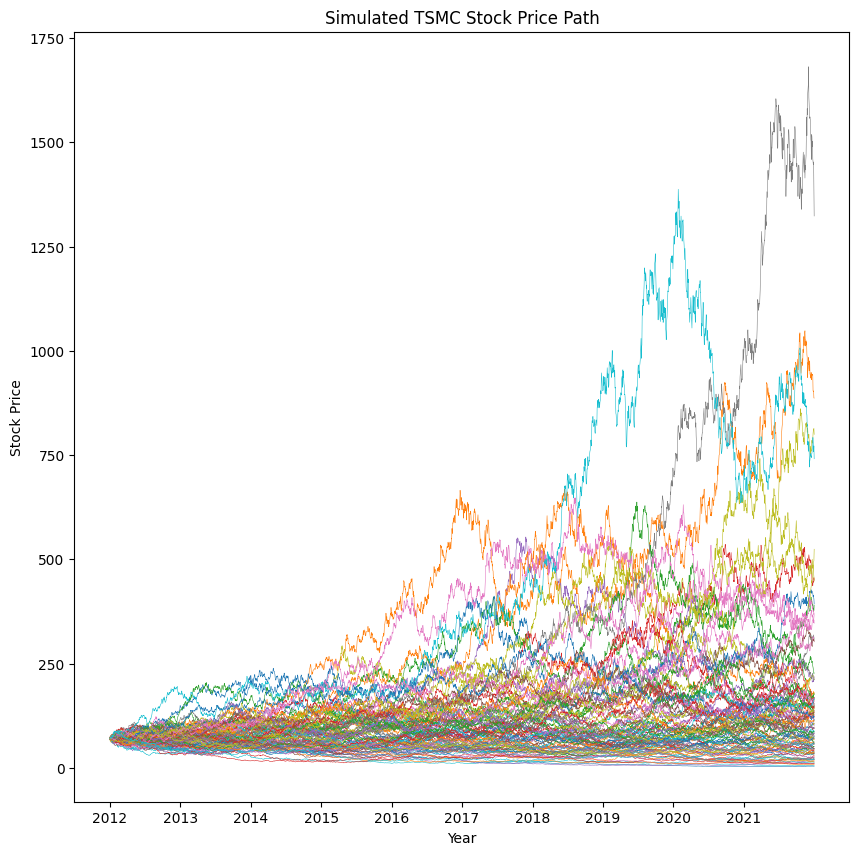

In [20]:
# 模擬結果
plt.figure(figsize=(10, 10))
for i in range(n_sims):
    plt.plot(simulation[:, i], lw=0.4)

n_years = 10 # 需要10年
ticks_per_year = int(n_steps / n_years)
plt.xticks(
    [i for i in range(0, n_steps, ticks_per_year)],
    [str(2012 + i) for i in range(0, n_years)], # 從2012開始模擬
)
plt.title('Simulated TSMC Stock Price Path')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()

[*********************100%***********************]  1 of 1 completed


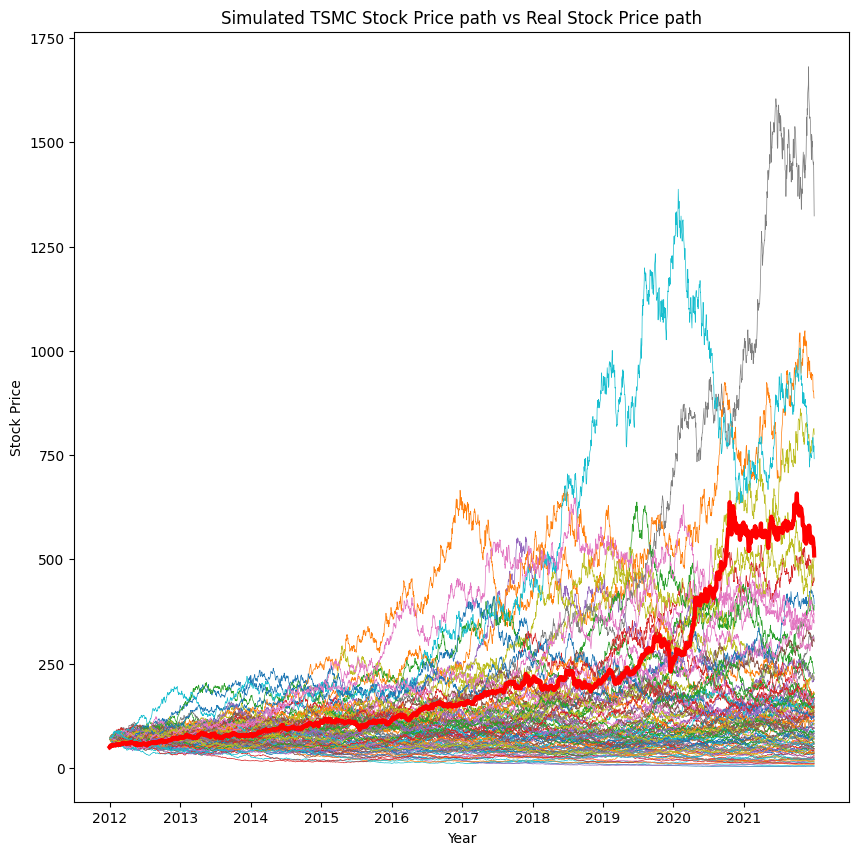

In [21]:
# 加入真實數據
plt.figure(figsize=(10, 10))

data1 = yf.download(symbol, start="2012-01-01", end="2023-01-01")['Adj Close']
nreal = len(data1)
n = min(nreal, n_steps) # 處理筆數不對齊

for i in range(n_sims):
    plt.plot(simulation[:n, i], lw=0.5) # 加入參數alpha，可調整線條透明度

plt.plot(np.arange(n), data1[:n], lw=3, label="Real Data", color='red')

n_years = 10 # 需要畫10年
ticks_per_year = int(n_steps / n_years)
plt.xticks(
    [i for i in range(0, n_steps, ticks_per_year)],
    [str(2012 + i) for i in range(0, n_years)], # 從2012開始模擬
)
plt.title('Simulated TSMC Stock Price path vs Real Stock Price path')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()